In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.feature_selection import RFECV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [14]:
#Load the Titanic dataset from scikit_learn
titanic = fetch_openml(data_id=40945, as_frame=True)

In [15]:
#Converting the Titanic dataset to a DataFrame
titanic_df = titanic.frame

In [16]:
#Accessing the first 5 rows of the dataset
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [17]:
#Accessing the columns of the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   survived   1309 non-null   category
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   float64 
 6   parch      1309 non-null   float64 
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
dtypes: category(3), float64(6), object(5)
memory usage: 116.8+ KB


In [18]:
#Select the numericals features(columns)
numerical_features = ['pclass','age', 'sibsp','parch','fare']

In [19]:
#Drop rows with missing values in numerical columns
titanic_df = titanic_df.dropna(subset=numerical_features)

In [20]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   float64 
 1   survived   1045 non-null   category
 2   name       1045 non-null   object  
 3   sex        1045 non-null   category
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   float64 
 6   parch      1045 non-null   float64 
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   category
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
dtypes: category(3), float64(6), object(5)
memory usage: 101.4+ KB


In [39]:
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [22]:
#Detect columns with outliners(zscore is used to check variables that are outliers)
outliers = {}
for col in numerical_features:
    z_scores = zscore(titanic_df[col])
    outliers[col] = titanic_df[abs(z_scores) >3]
print(outliers.keys())

dict_keys(['pclass', 'age', 'sibsp', 'parch', 'fare'])


In [23]:
#Initialize standard scaler
scaler = StandardScaler()

In [40]:
#Scaling data into a numpy array
scaled_numerical = scaler.fit_transform(titanic_df[numerical_features])

In [41]:
scaled_numerical

array([[-1.43460054, -0.05922789, -0.55189718, -0.50146236,  3.13524319],
       [-1.43460054, -2.01185519,  0.54455254,  1.88048384,  2.06197191],
       [-1.43460054, -1.93653352,  0.54455254,  1.88048384,  2.06197191],
       ...,
       [ 0.94312755, -0.23305249, -0.55189718, -0.50146236, -0.5288686 ],
       [ 0.94312755, -0.19828757, -0.55189718, -0.50146236, -0.5288686 ],
       [ 0.94312755, -0.05922789, -0.55189718, -0.50146236, -0.51720017]])

In [42]:
#Convert Scaled_numerical to a DataFrame
scaled_numerical_df = pd.DataFrame(scaled_numerical,columns=numerical_features)

In [43]:
scaled_numerical_df.head()

,pclass,age,sibsp,parch,fare
0,-1.434601,-0.059228,-0.551897,-0.501462,3.135243
1,-1.434601,-2.011855,0.544553,1.880484,2.061972
2,-1.434601,-1.936534,0.544553,1.880484,2.061972
3,-1.434601,0.010302,0.544553,1.880484,2.061972
4,-1.434601,-0.337347,0.544553,1.880484,2.061972


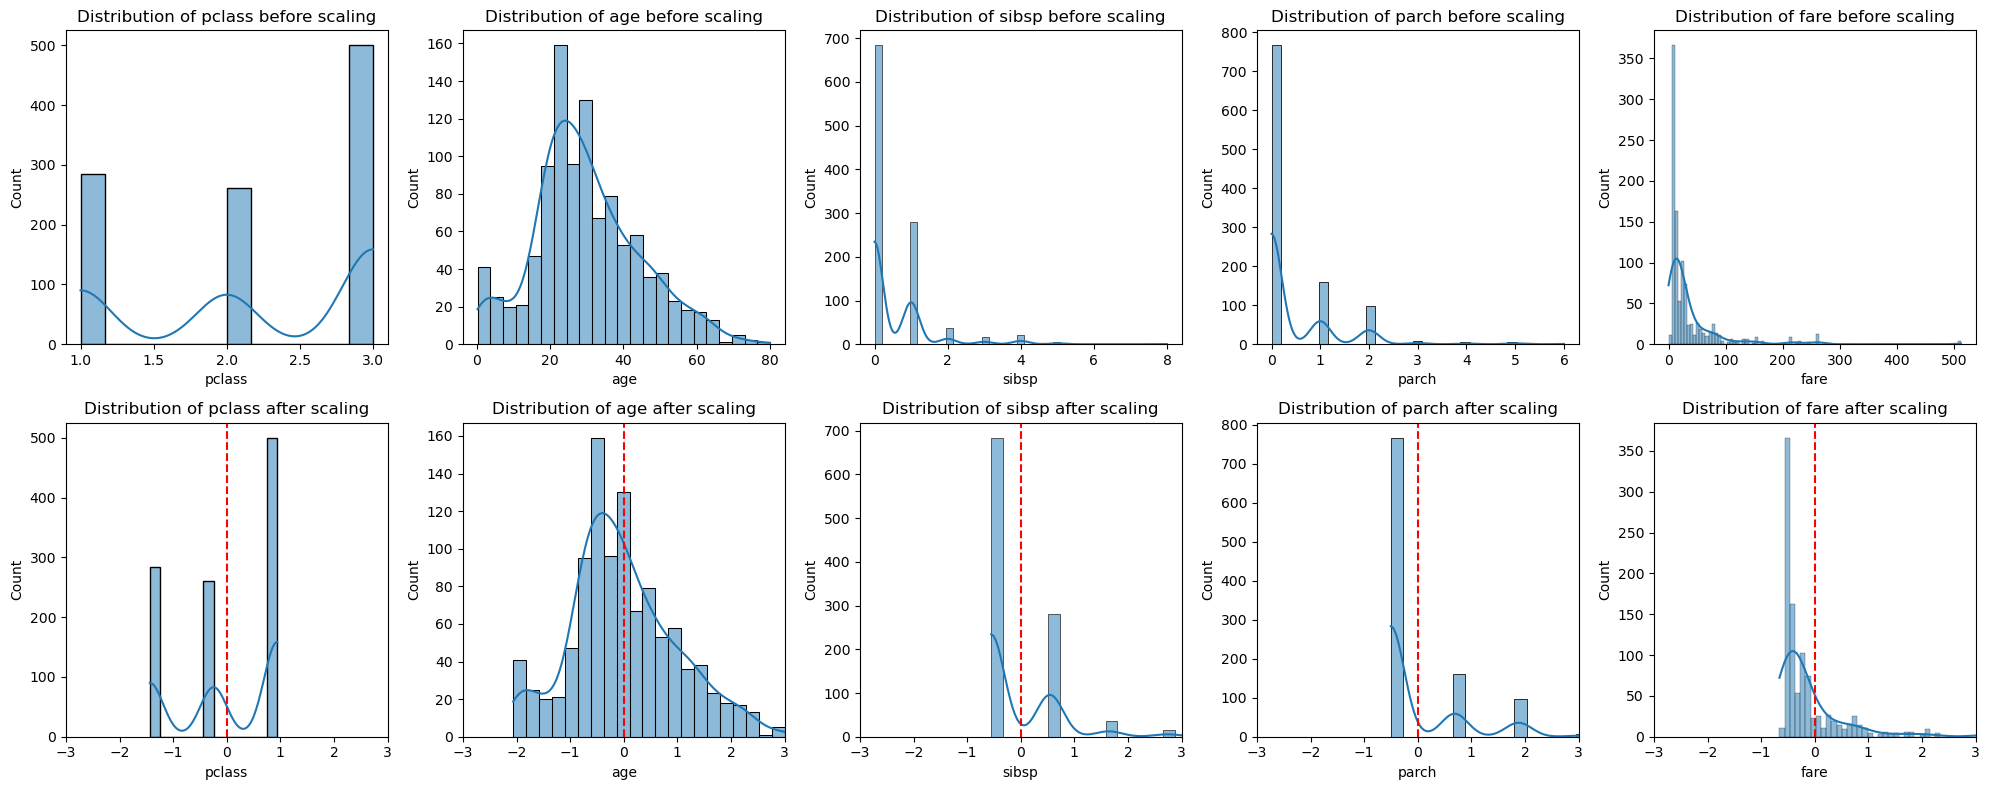

In [44]:
#Visualize the data
fig,axes = plt.subplots(nrows=2, ncols=len(numerical_features),figsize=(20,8))
#plot numerical features before scaling
for idx, col in enumerate(numerical_features):
    sns.histplot(titanic_df[col],ax=axes[0,idx],kde=True)
    axes[0,idx].set_title(f'Distribution of {col} before scaling')

#plot numerical features after scaling
for idx, col in enumerate(numerical_features):
    sns.histplot(scaled_numerical_df[col],ax=axes[1,idx], kde=True)
    axes[1,idx].axvline(0,color='r',linestyle='--')
    axes[1,idx].set_title(f'Distribution of {col} after scaling')
    axes[1,idx].set_xlim(-3,3)

plt.tight_layout()
plt.show()


#### Encoding of Categories in the Titanic DataFrame

In [45]:
titanic = fetch_openml(data_id=40945, as_frame=True)
titanic_df = titanic.frame

In [46]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   survived   1309 non-null   category
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   float64 
 6   parch      1309 non-null   float64 
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
dtypes: category(3), float64(6), object(5)
memory usage: 116.8+ KB


In [49]:
#Accessing the columns in the dataset
titanic_df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [56]:
features = ['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']
#numerical columns
numerical_cols = titanic_df.select_dtypes(include=['float64','int64']).columns
#Categorical columns
categorical_cols = titanic_df.select_dtypes(include=['object','category']).columns

#Handling missing values
imputer_numerical = SimpleImputer(strategy='mean')
for col in numerical_cols:
    titanic_df[col] = imputer_numerical.fit_transform(titanic_df[[col]])

imputer_categorical = SimpleImputer(strategy='most_frequent')
for col in categorical_cols:
    titanic_df[col] = imputer_categorical.fit_transform(titanic_df[col].values.reshape(-1,1))[:,0]


#encode Categorical variables using LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_cols:
    titanic_df[col] = label_encoder.fit_transform(titanic_df[col])

#Scaling the data
scaler = StandardScaler()
titanic_scaled = scaler.fit_transform(titanic_df[features])

#Using a wrapper method
#target variable
titanic_df['survived'] = titanic_df['survived'].astype('category')

#separation(wrapper method)
X = titanic_scaled
y = titanic_df['survived']

#use Logistic Regression(Category)
estimator = LogisticRegression()
selector = RFECV(estimator,step=1,cv=5)  #cv= 5 means splitting it to 5 parts
selector = selector.fit(X,y.cat.codes)

#Selected features
selected_features = [features[i] for i, support in enumerate(selector.support_) if support]
selected_features += list(categorical_cols)

print(selected_features)

['survived', 'survived']
